## Ejercisio de regresión lineal

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [3]:
## cargamos el csv
data=pd.read_csv("archivos/publicidad.csv")
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [5]:
## usando librerias para la regresion lineal
import statsmodels.formula.api as smf

In [6]:
## crear modelo lineal
lm=smf.ols(formula="Sales~TV", data=data).fit() 
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## el modelo lineal productivo sería
> por cada dolar gastado en TV generá esa cantidad de ventas
>
>sales=7.032594+0.047537*TV

In [7]:
## P valores para saber el nivel de sicnificancia, podemos asegurar que el corte no es cero
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [8]:
## obtener R2 R cuadrada, nos dice que tanto se parecen los datos
## los datos predictorios y los datos del modelo
lm.rsquared

0.611875050850071

In [9]:
## r2 ajustada
lm.rsquared_adj

0.6099148238341623

In [10]:
## resumen
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           1.47e-42
Time:                        22:54:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
## predecir los datos
prediccion=lm.predict(pd.DataFrame(data["TV"]))
data_modelo=pd.DataFrame({
    "TV": data["TV"],
    "Prediccion": prediccion
})
data_modelo

,TV,Prediccion
0,230.1,17.970775
1,44.5,9.147974
2,17.2,7.850224
3,151.5,14.234395
4,180.8,15.627218
...,...,...
195,38.2,8.848493
196,94.2,11.510545
197,177.0,15.446579
198,283.6,20.513985


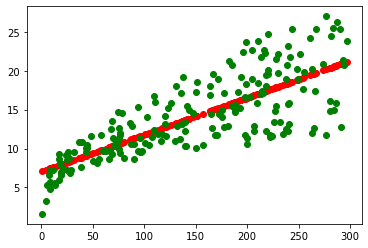

In [12]:
%matplotlib inline
plt.plot(data["TV"], data_modelo["Prediccion"], "ro")
plt.plot(data["TV"], data["Sales"], "go")

In [13]:
data["pred"]=lm.params[0]+lm.params[1]*data["TV"]
data.head()

,TV,Radio,Newspaper,Sales,pred
0,230.1,37.8,69.2,22.1,17.970775
1,44.5,39.3,45.1,10.4,9.147974
2,17.2,45.9,69.3,9.3,7.850224
3,151.5,41.3,58.5,18.5,14.234395
4,180.8,10.8,58.4,12.9,15.627218


In [14]:
data["RSE"]=(data["Sales"]-data["pred"])**2
SSD=np.sum((data["Sales"]-data["pred"])**2)
## suma de los cuadrados de las diferencias
print(SSD)
RSE=np.sqrt(SSD/(len(data)-2))
RSE

2102.5305831313512


3.2586563686504624

In [15]:
## promedio de las ventas
promedio_ventas=data["Sales"].mean()
promedio_ventas

14.022500000000003

In [16]:
error=RSE/promedio_ventas
error

0.23238768897489476

In [17]:
## porcentaje de error en una predicción y el mismo dato
## varianza del modelo que no queda explicada
error

0.23238768897489476

In [18]:
## modelo de regresión multiple
## se tienen diferentes coeficientes para cada una de las variables
## minimizar la minima de los cuadrados
## sales tv
## sales radio
## sales tv radio
## sales tv newspaper
## sales radio tv
## K número de variables predictorias
## eliminar aquellas variables con p valor alto, todas las que esten menos de 0.5
## agregar una variable que aumente el valor del r cuadrado
## r cuadrado ajustado nos aydua cuando vamos incorporando más variables al modelo
## cada que añadimos una variable debe aumentar el valor de r cuadrado
## selcción adelante empezar con un modelo nulo, empezar a añadir variables predictorias
## la que tenga menor suma de los cuadrados residuales será la primera en añadirse al modelo
## si el p valor es pequeño y el r cuadrado sube entonces se ira aumentando al modelo

## modelo hacia atras, planeta tener todas las variables
## se les va descargando, si el p valor es demasiado grande 
## si el quitar la variable no fecta el r2 cuadrado entonces es removida
## puede ocurrir que el p valor sea alto pero que el r cuadrado ajustado se mantiene o baja mucho, no conviene quitarla


In [24]:
## añadir newspaper al modelo
## predecir las ventas en funcion de la tv más newspaper
lm2=smf.ols(formula="Sales~TV+Newspaper", data=data).fit()

In [25]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [27]:
## son bastante pequeños por lo tanto no son nulos
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64